# 1. Import Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report
import matplotlib.image as mpimg

 # 2. Load Data

## 2.1. ImageDataGenerator
prepare untuk preprocessing pada image seperti yang kita lakukan di data augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1)

test_datagen  = ImageDataGenerator(rescale=1./255)

## 2.2. Data Flow

In [3]:
size = (40,60)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Course Files/Course-Net/02. Kampus Merdeka/09. Computer Vision/data/train',
                                                    target_size=size,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical')


test_generator  = test_datagen.flow_from_directory('/content/drive/MyDrive/Course Files/Course-Net/02. Kampus Merdeka/09. Computer Vision/data/test',
                                                    target_size=size,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical')

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [4]:
target_names = list(train_generator.class_indices.keys())
target_names

['invasive', 'noninvasive']

# 3. Build CNN Architecture

## 3.1. Model Architecture

Dalam CNN akan digabungkan semuanya mulai dari :
1. konvolusi/filter (ukuran filter, padding, stride)
2. pooling
3. fully connected layer (matriks hasil pooling diubah menjadi vektor)

In [5]:
model = tf.keras.Sequential([
    ## Conv Block 1
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(size[0],size[1],3)),
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),

    ## Conv Block 2
    tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.Conv2D(filters=4,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),

    ## Proses mengubah jadi vektor
    tf.keras.layers.Flatten(),

    ## Output Layer
    tf.keras.layers.Dense(units=2,activation='softmax')

])

## 3.2. Optimizer

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

## 3.3. Summary

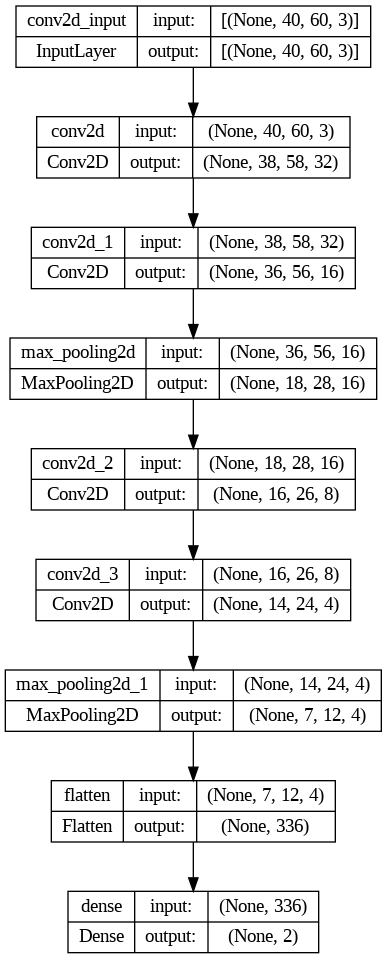

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 58, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 56, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 28, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 26, 8)         1160      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 24, 4)         292       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 12, 4)          0         
 g2D)                                                   

# 4. Training

In [9]:
import time

In [11]:
start_time = time.time()

trained_model = model.fit(train_generator,
                          epochs=50,
                          validation_data = test_generator )


end_time   = time.time()
duration   = np.round((end_time - start_time)/60,2)
print("\nTime Elapsed for training model : ",duration,"minutes.")

Epoch 1/50
32/32 [==============================] - 579s 19s/step - loss: 0.6900 - accuracy: 0.5200 - val_loss: 0.6775 - val_accuracy: 0.6250
Epoch 2/50
32/32 [==============================] - 7s 211ms/step - loss: 0.6413 - accuracy: 0.6560 - val_loss: 0.6448 - val_accuracy: 0.6300
Epoch 3/50
32/32 [==============================] - 7s 214ms/step - loss: 0.6275 - accuracy: 0.6450 - val_loss: 0.5811 - val_accuracy: 0.6900
Epoch 4/50
32/32 [==============================] - 7s 228ms/step - loss: 0.5864 - accuracy: 0.6870 - val_loss: 0.5488 - val_accuracy: 0.7325
Epoch 5/50
32/32 [==============================] - 6s 197ms/step - loss: 0.5860 - accuracy: 0.6790 - val_loss: 0.6303 - val_accuracy: 0.5950
Epoch 6/50
32/32 [==============================] - 7s 222ms/step - loss: 0.5602 - accuracy: 0.7230 - val_loss: 0.6046 - val_accuracy: 0.6825
Epoch 7/50
32/32 [==============================] - 6s 200ms/step - loss: 0.5430 - accuracy: 0.7290 - val_loss: 0.5646 - val_accuracy: 0.6850
Epoch 

# 5. Model Performance

## 5.1. Accuracy and Loss

In [14]:
print("Model Performance on Data Train")
loss,acc = model.evaluate_generator(train_generator)
print(f"Loss     : {np.round(loss,2)}")
print(f"Accuracy : {np.round(acc,2)}")

print("\nModel Performance on Data Testing")
loss,acc = model.evaluate_generator(test_generator)
print(f"Loss     : {np.round(loss,2)}")
print(f"Accuracy : {np.round(acc,2)}")

Model Performance on Data Train


<ipython-input-14-abe1e9b86a5c>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,acc = model.evaluate_generator(train_generator)


Loss     : 0.33
Accuracy : 0.87

Model Performance on Data Testing


<ipython-input-14-abe1e9b86a5c>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,acc = model.evaluate_generator(test_generator)


Loss     : 0.24
Accuracy : 0.9


## 5.2. Model Performance History

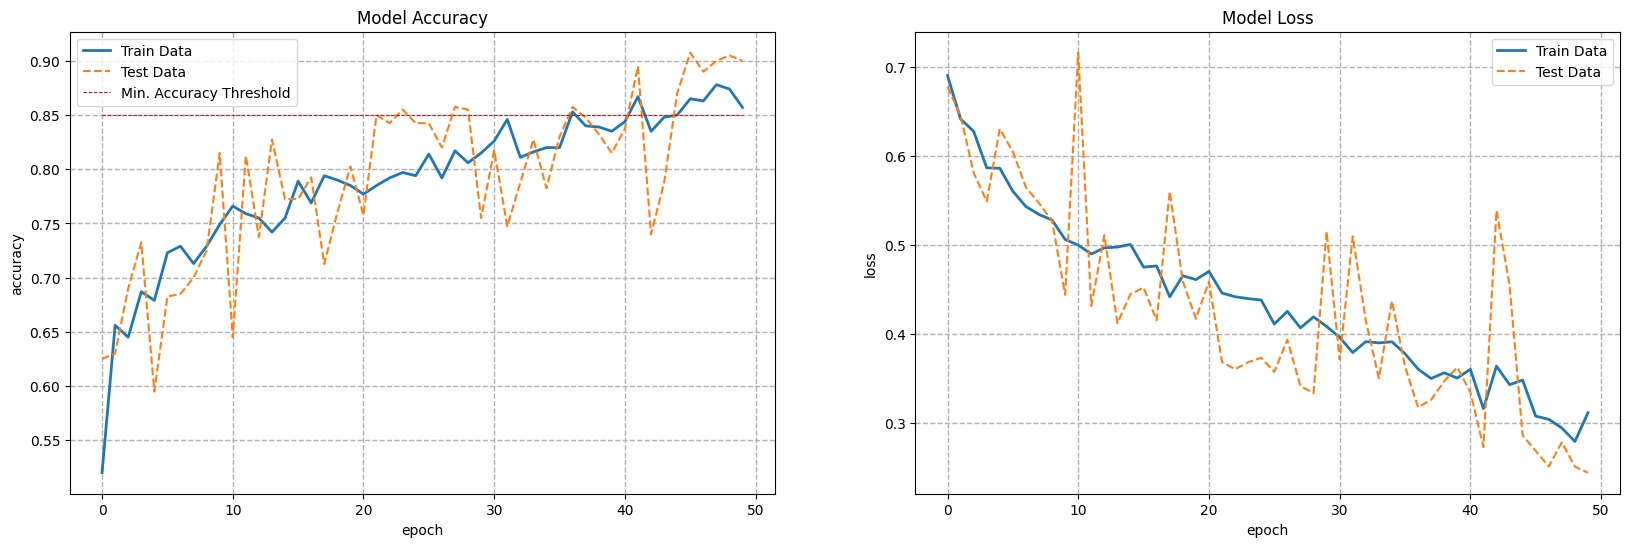

In [15]:
def plot_trained_model_history(trained_model,min_acc):
    acc     = trained_model.history['accuracy']
    val_acc = trained_model.history['val_accuracy']

    loss     = trained_model.history['loss']
    val_loss = trained_model.history['val_loss']

    plt.figure(figsize=(20, 6))

    length   = len(acc)
    min_acc  = [min_acc]*length

    # Grafik Nilai Akurasi
    plt.subplot(1, 2, 1)
    plt.title('Model Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(acc, label='Train Data',linewidth=2)
    plt.plot(val_acc, label='Test Data', linestyle='--')
    plt.plot(min_acc, label='Min. Accuracy Threshold',linestyle='--',color='red',linewidth=.7)
    plt.legend()
    plt.grid(linestyle='--', linewidth=1)

    # Grafik Nilai Loss
    plt.subplot(1, 2, 2)
    plt.title('Model Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(loss, label='Train Data',linewidth=2)
    plt.plot(val_loss, label='Test Data', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1)

    plt.show()

plot_trained_model_history(trained_model,0.85)

# 6. Save Model

In [16]:
## save model
model.save('model_cnn_invasive.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
## load the model
from tensorflow.keras.models import load_model

new_model = load_model('model_cnn_invasive.h5')

# 7. Backtesting and Visualization

13/13 [==============================] - 2s 152ms/step


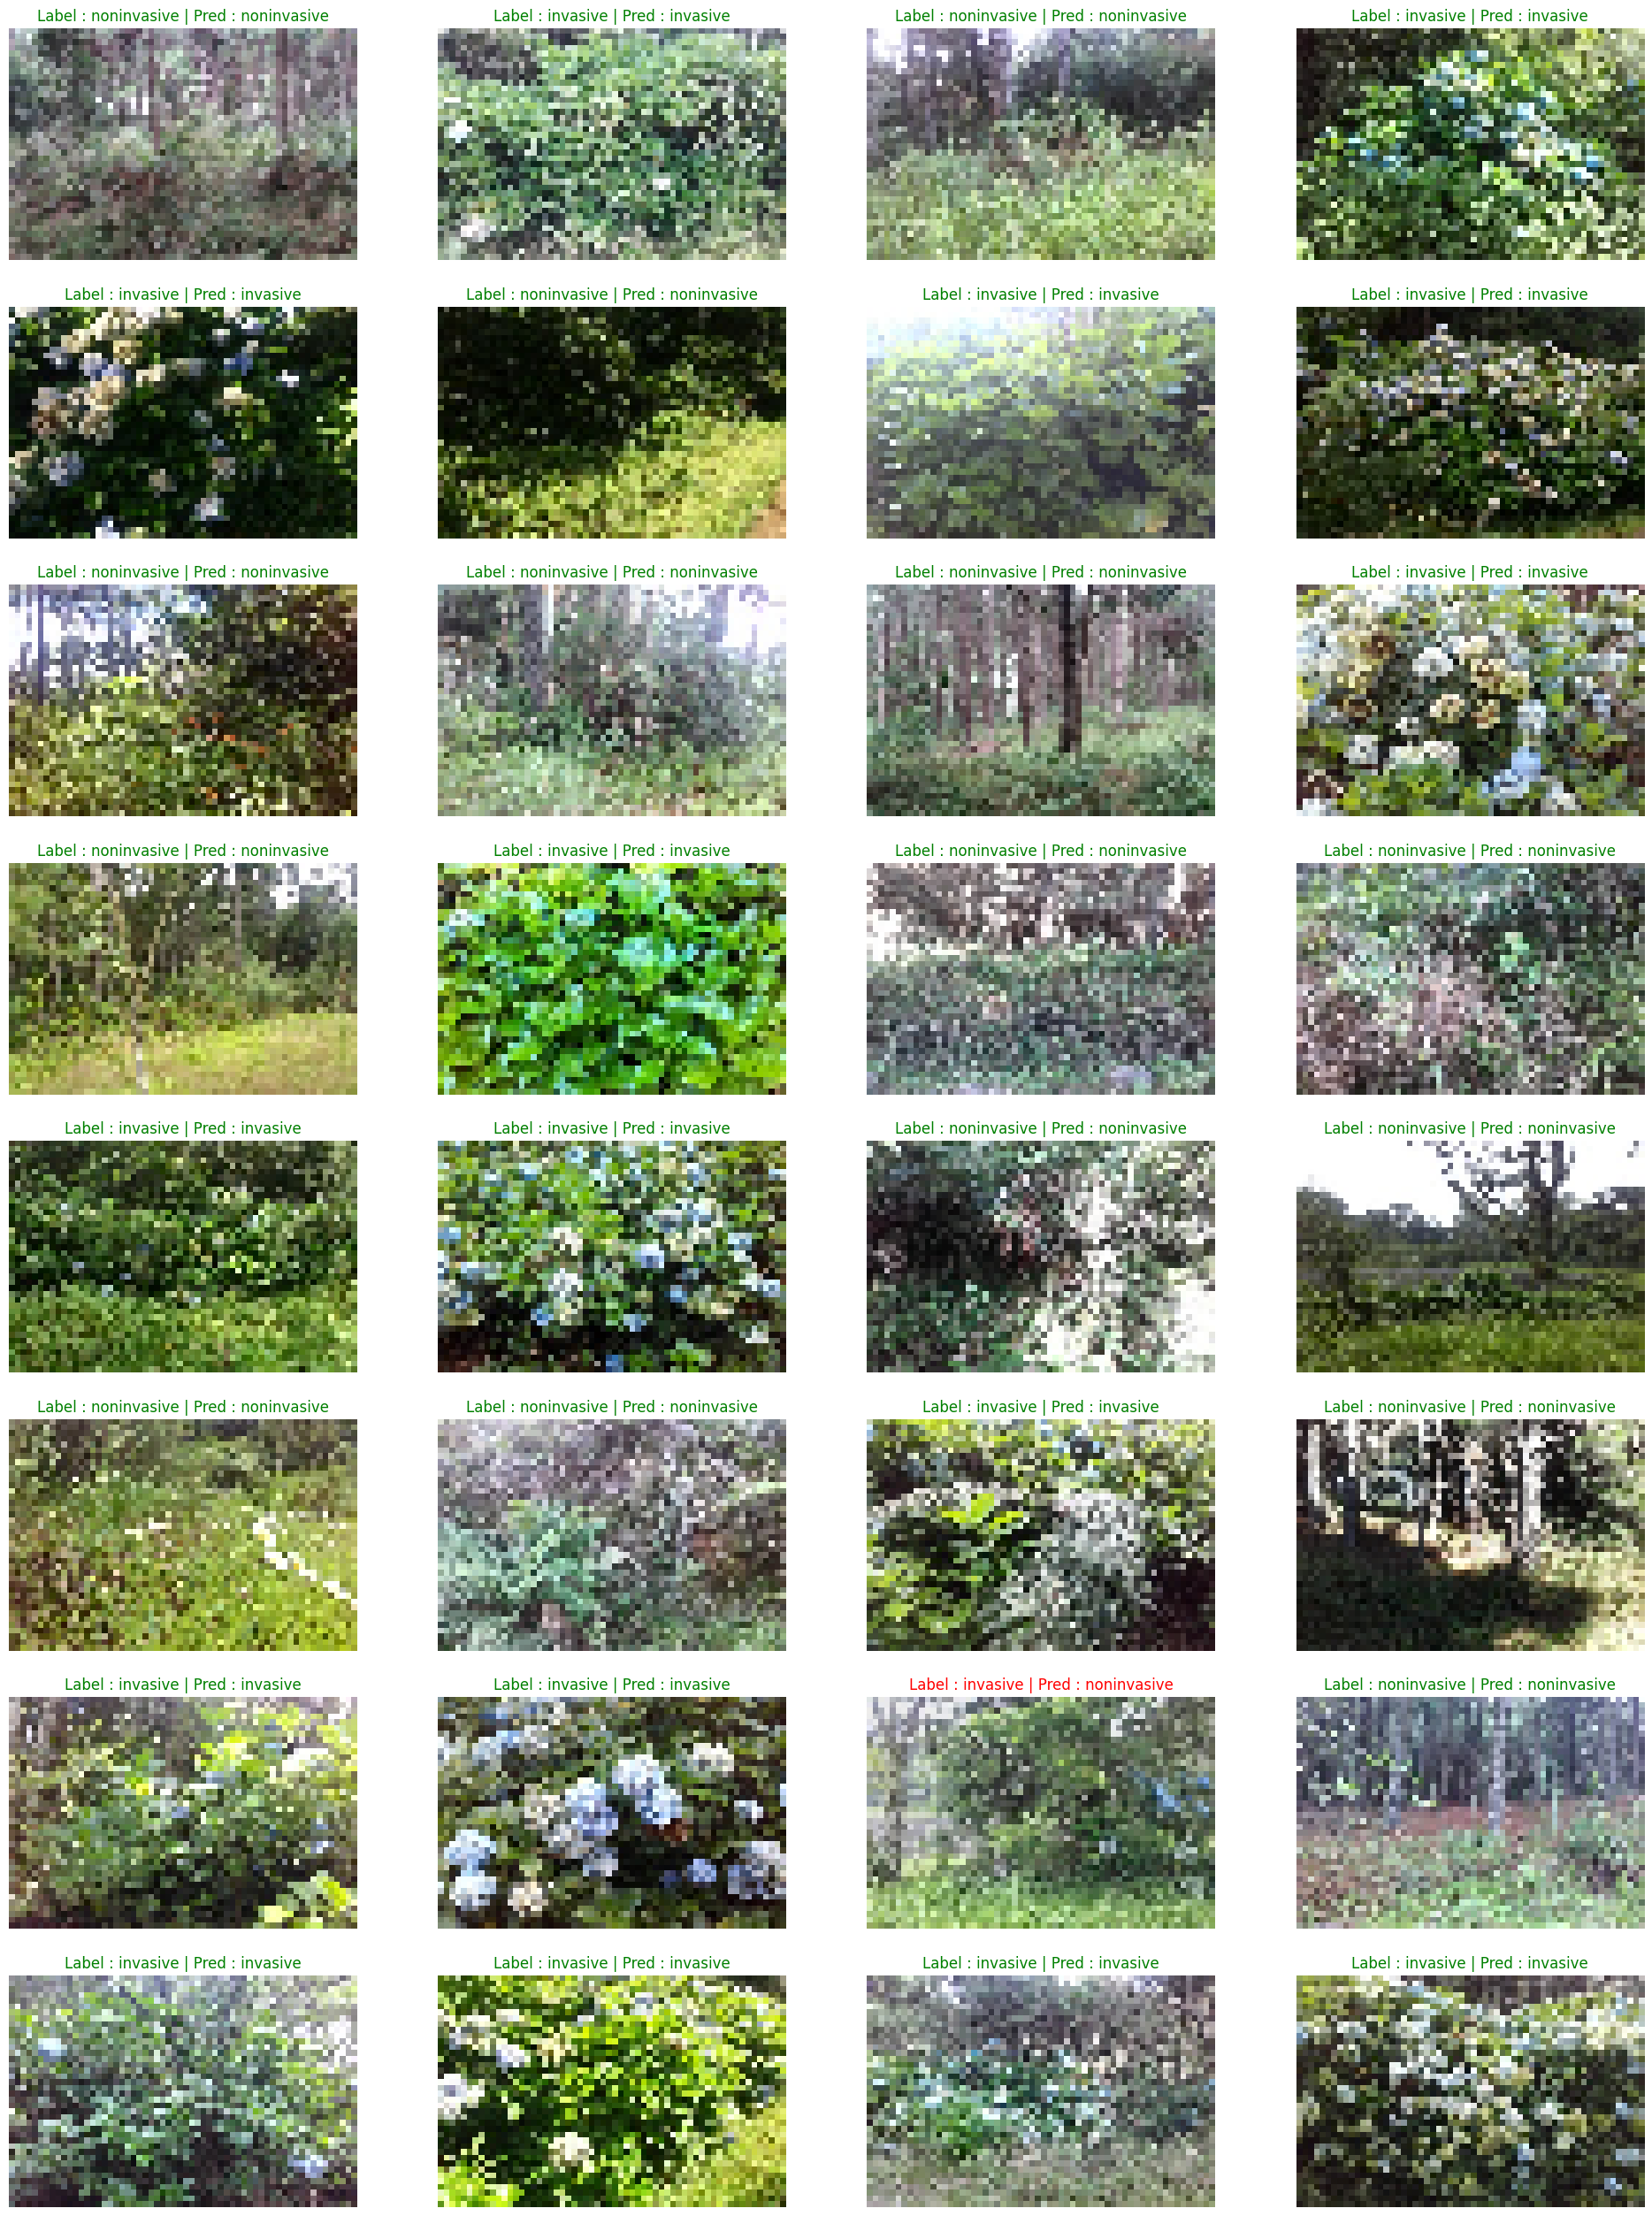

In [19]:
import matplotlib.pyplot as plt

feature,target = next(iter(test_generator))
y_pred = new_model.predict(test_generator)
y_pred

fig,axes = plt.subplots(8,4,figsize=(24,32))
for img,label,pred,ax in zip(feature,target,y_pred,axes.flatten()):
    ax.imshow(img)
    label = label.argmax()
    pred  = pred.argmax()

    font = {"color":"g"} if label == pred else {"color":"r"}

    label_name,pred_name = target_names[label], target_names[pred]

    ax.set_title(f"Label : {label_name} | Pred : {pred_name}", fontdict=font)
    ax.axis("off");